In [ ]:
#@title Mount Google Drive {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports

from zipfile import ZipFile # to extraxt information from zipfile
import os # to access files in the opereating system...(here we are going to access files from the drive only)
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

### facial-age dataset 

In [ ]:
# Unzipping the dataset file facial-age.zip

facial_age_zip_path = "/content/drive/My Drive/Faces_Dataset/ZIPPED_DATASET/facial-age.zip"

with ZipFile(facial_age_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping facial-age.zip')

Done unzipping facial-age.zip


In [ ]:
# Accessing all folder names to get list of labels. i.e lisst of ages

facial_age_path = "/content/facial-age"
facial_age_folders = os.listdir(facial_age_path)

In [ ]:
# Sorting in ascending order.

facial_age_folders = np.sort(facial_age_folders)
facial_age_folders

array(['001', '002', '003', '004', '005', '006', '007', '008', '009',
       '010', '011', '012', '013', '014', '015', '016', '017', '018',
       '019', '020', '021', '022', '023', '024', '025', '026', '027',
       '028', '029', '030', '031', '032', '033', '034', '035', '036',
       '037', '038', '039', '040', '041', '042', '043', '044', '045',
       '046', '047', '048', '049', '050', '051', '052', '053', '054',
       '055', '056', '057', '058', '059', '060', '061', '062', '063',
       '064', '065', '066', '067', '068', '069', '070', '071', '072',
       '073', '074', '075', '076', '077', '078', '079', '080', '081',
       '082', '083', '084', '085', '086', '087', '088', '089', '090',
       '091', '092', '093', '095', '096', '099', '100', '101', '110'],
      dtype='<U3')

In [ ]:
#making a dictionary with key as age and value as number of images available for a paticular age
facial_age_images = {}

for age in facial_age_folders:
    temp_path = os.path.join(facial_age_path, age)
    n_images = len(os.listdir(temp_path))
    facial_age_images[int(age)] = n_images

### UTKFace dataset 

In [ ]:
# Unzipping the dataset file UTKFace.zip

utkface_zip_path = "/content/drive/My Drive/Faces_Dataset/ZIPPED_DATASET/UTKFace.zip"

with ZipFile(utkface_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping UTKFace.zip')

Done unzipping UTKFace.zip


In [ ]:
# Accessing all image file names to get ages

utkface_path = '/content/UTKFace'
utkface_image_names = os.listdir(utkface_path)

In [ ]:
# function to generate the labels from the image file names according to the format given above.

def age_gender_race_split(image_name):
    image_labels = image_name.split('_')
    age = image_labels[0]
    gender = image_labels[1]
    race = image_labels[2]

    return (age, gender, race)

In [ ]:
# Applying the above function on each image file name using a for loop and storing the labels in relevant arrays.

utkface_age_labels = np.array([])
utkface_gender_labels = np.array([])
utkface_race_labels = np.array([])

for image in utkface_image_names:
    age, gender, race = age_gender_race_split(image)
    utkface_age_labels = np.append(utkface_age_labels, age)
    utkface_gender_labels = np.append(utkface_gender_labels, gender)
    utkface_race_labels = np.append(utkface_race_labels, race)

In [ ]:
# Grouping by the age labels and checking the no. of images per age label.

utkface_ages_counts = pd.Series(utkface_age_labels).value_counts()
utkface_ages_counts

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
91        2
101       2
111       1
103       1
Length: 104, dtype: int64

In [ ]:
# Storing the grouped age labels series generated above in a dictionary with
# the age labels as keys and the no. of images per age label as values.

utkface_images = {}

for age, counts in utkface_ages_counts.items():
    utkface_images[int(age)] = counts

### Classes for Age Classification

In [ ]:
facial_age_ages = list(facial_age_images.keys())
utkface_ages = list(utkface_images.keys())

In [ ]:
# Combining the lists of age values from the two datasets and
# converting the combined list to a set to keep only the unique age values.
facial_age_ages.extend(utkface_ages)
unique_ages = set(facial_age_ages)

In [ ]:
# Creating a dictionary of age labels as keys and no. of images per age label in both datasets combined as values,

combined_images = {}

for age in unique_ages:
    fc_image = 0
    utk_image = 0

    # Using try avoid KeyError in case a particular age value does not exist
    try:
        fc_image = facial_age_images[age]
    except:
        pass
    
    try:
        utk_image = utkface_images[age]
    except:
        pass
    
    # Summing up the no. of images for the age label.
    combined_images[age] = fc_image + utk_image

In [ ]:
# Creating a dataframe to store the no. of images per age label in facial-age dataset, UTKFace dataset and the combined dataset.

images_df = pd.DataFrame(combined_images.values(), index=combined_images.keys(), columns=['combined_images'])
images_df['facial_age_images'] = pd.Series(facial_age_images)
images_df['utkface_images'] = pd.Series(utkface_images)

images_df

,combined_images,facial_age_images,utkface_images
1,2235,1112.0,1123
2,957,475.0,482
3,573,284.0,289
4,533,260.0,273
5,376,180.0,196
...,...,...,...
105,5,NaN,5
110,7,2.0,5
111,1,NaN,1
115,3,NaN,3


In [ ]:
# Imputing the null values in above dataframe with 0s.
images_df.fillna(0, inplace=True)
images_df = images_df.astype(int)

images_df

,combined_images,facial_age_images,utkface_images
1,2235,1112,1123
2,957,475,482
3,573,284,289
4,533,260,273
5,376,180,196
...,...,...,...
105,5,0,5
110,7,2,5
111,1,0,1
115,3,0,3


In [ ]:
# Exporting above created dataframe

images_df.to_csv("/content/drive/My Drive/age_classification/input_output/images_summary.csv", index=True, index_label='age')

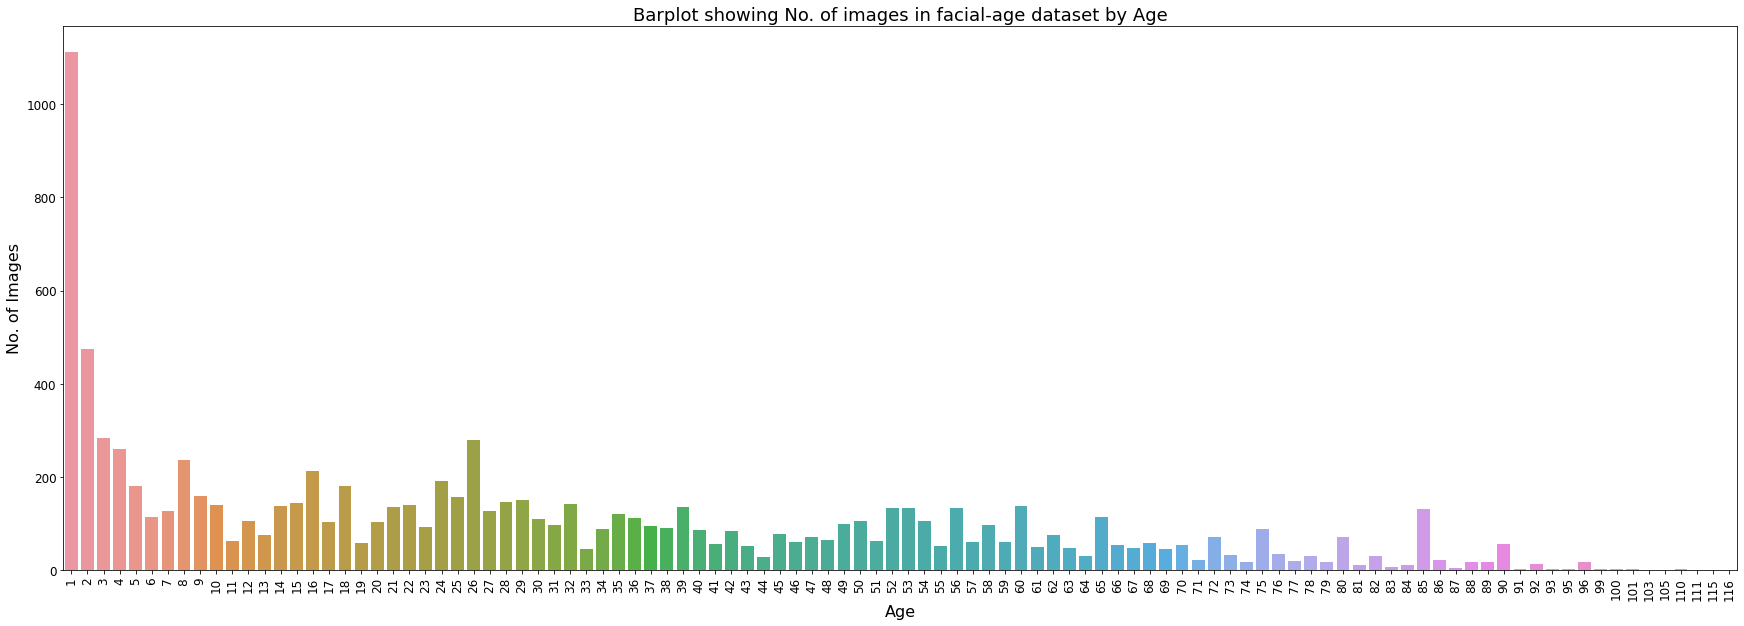

In [ ]:
# Plotting the no. of images by ages in a barplot.

plt.figure(figsize=(30, 10))

ax = sns.barplot(x=images_df.index, y=images_df['facial_age_images'])

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=90)

plt.xlabel("Age", fontsize=16)
plt.ylabel("No. of Images", fontsize=16)

plt.title("Barplot showing No. of images in facial-age dataset by Age", fontsize=18)

# Exporting image
plt.savefig('/content/drive/My Drive/age_classification/plot_images/barplot_facial_age_images.png', bbox_inches='tight');

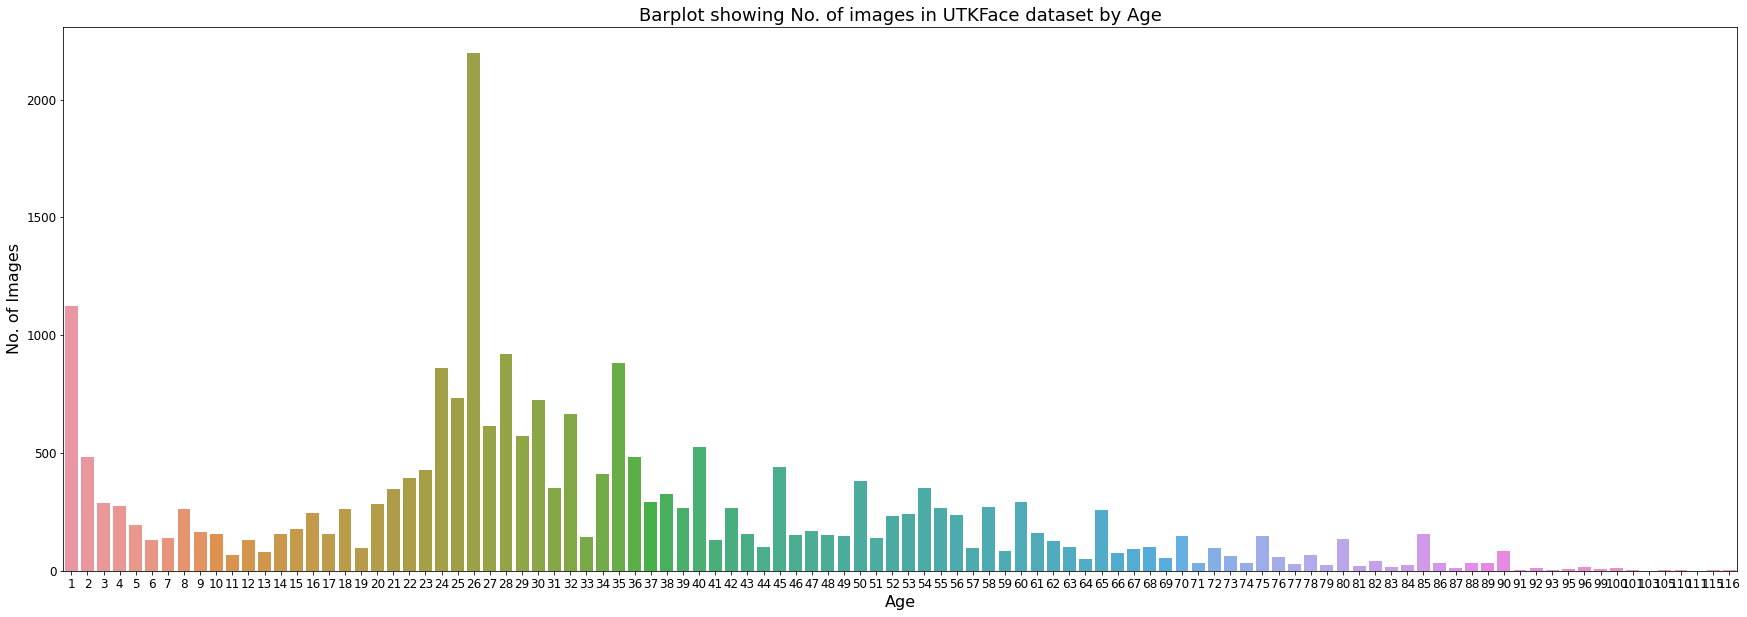

In [ ]:
# Plotting the no. of images by ages in a barplot.

plt.figure(figsize=(30, 10))

ax = sns.barplot(x=images_df.index, y=images_df['utkface_images'])

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x')

plt.xlabel("Age", fontsize=16)
plt.ylabel("No. of Images", fontsize=16)

plt.title("Barplot showing No. of images in UTKFace dataset by Age", fontsize=18)

# Exporting image
plt.savefig('/content/drive/My Drive/age_classification/plot_images/barplot_utkface_images.png', bbox_inches='tight');

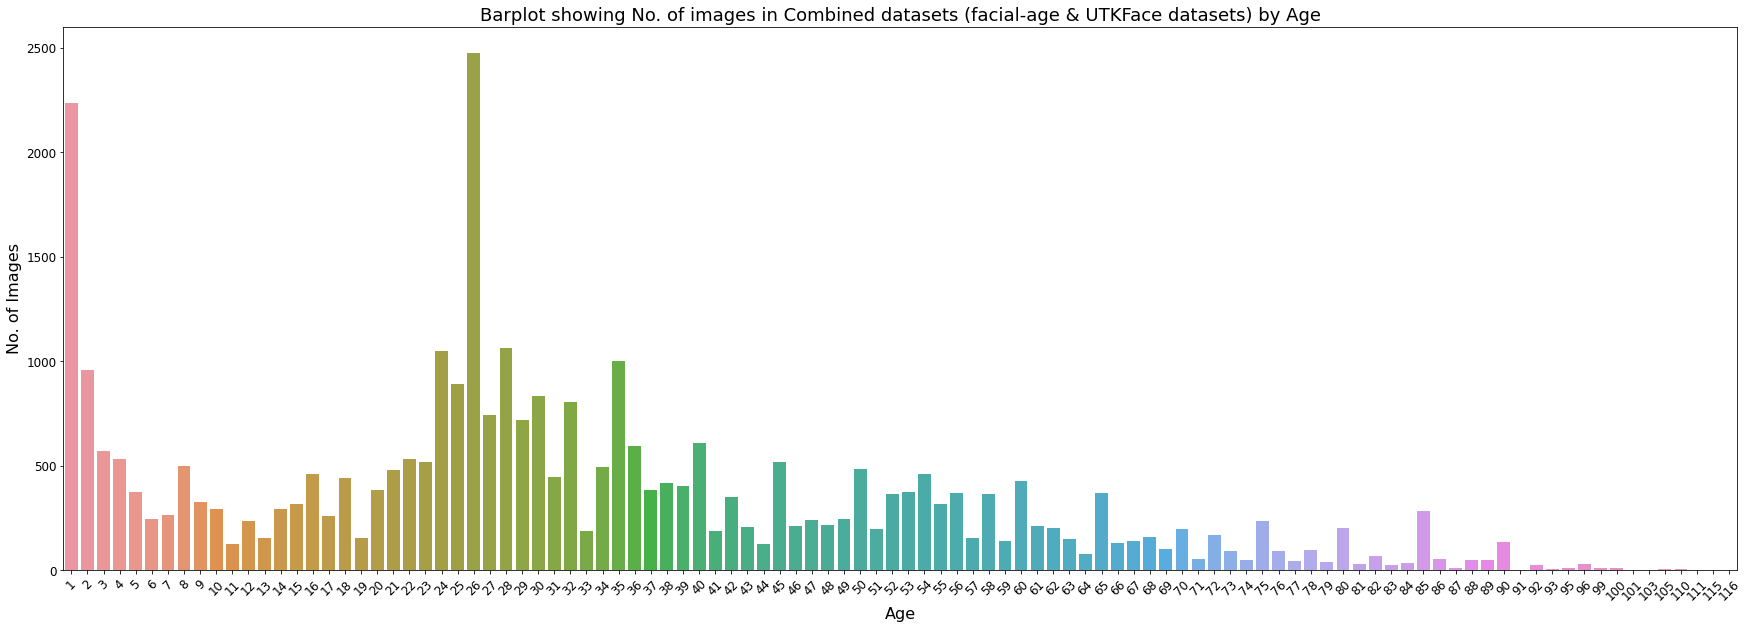

In [ ]:
# Plotting the no. of images by ages in a barplot.

plt.figure(figsize=(30, 10))

ax = sns.barplot(x=images_df.index, y=images_df['combined_images'])

ax.tick_params(axis='both', labelsize=12)
ax.tick_params(axis='x', labelrotation=45)

plt.xlabel("Age", fontsize=16)
plt.ylabel("No. of Images", fontsize=16)

plt.title("Barplot showing No. of images in Combined datasets (facial-age & UTKFace datasets) by Age", fontsize=18)

# Exporting plot image in PNG format.
plt.savefig('/content/drive/My Drive/age_classification/plot_images/barplot_combined_faces_images.png', bbox_inches='tight');

In [ ]:
# Defining a function to split the images in each dataset into n classes.

def split_classes(ser, n_classes):

    # target number of images per class 
    n_images = int(sum(ser) / n_classes)

    print(f"Total no. of images in dataset\t= {sum(ser)}")
    print(f"No. of classes desired\t\t= {n_classes}")
    print(f"So, target no. of images/class\t>= {sum(ser)}/{n_classes} = ~{n_images}")
    print()

    # dataframe to show the breakdown of age-ranges
    classes_df = pd.DataFrame(columns=['Age-ranges (classes)', 'No. of images', 'Class balance (%)'])

    age_index = 0

    for i in range(n_classes):
        if age_index<=103:
            age_start = ser.index[age_index]
            age_current = ser.index[age_index]
        else:
            break

        class_images = 0
        
        while class_images < n_images:
            class_images += ser[age_current]
            age_index += 1
            if age_index<=103:
                age_current = ser.index[age_index]
            else:
                break
        if age_index<=104:
            age_end = ser.index[age_index-1]
        else:
            break
        
        # Adding the above calculated variables into the dataframe
        classes_df.loc[i, 'Age-ranges (classes)'] = str(age_start)+" - "+str(age_end)
        classes_df.loc[i, 'No. of images'] = class_images
        classes_df.loc[i, 'Class balance (%)'] = round((class_images / sum(ser)) * 100, 2)
    
    # no. of images and the class balance.
    mean_images = int(round(np.mean(classes_df.loc[:, 'No. of images'])))
    mean_balance = round(np.mean(classes_df.loc[:, 'Class balance (%)']), 2)
    std_balance = round(np.std(classes_df.loc[:, 'Class balance (%)']), 2)
    
    print(f"Mean no. of images/class\t= ~{mean_images}")
    print(f"Mean class balance\t\t= {mean_balance}%")
    print(f"Std. of class balance\t\t= {std_balance}%")
    print()

    # Returning the dataframe with all the classes info.
    return classes_df

In [ ]:
# applying on facial dataset
facial_age_classes = split_classes(images_df['facial_age_images'], 11)
facial_age_classes

Total no. of images in dataset	= 9778
No. of classes desired		= 11
So, target no. of images/class	>= 9778/11 = ~888

Mean no. of images/class	= ~978
Mean class balance		= 10.0%
Std. of class balance		= 1.13%



,Age-ranges (classes),No. of images,Class balance (%)
0,1 - 1,1112,11.37
1,2 - 4,1019,10.42
2,5 - 10,955,9.77
3,11 - 18,1020,10.43
4,19 - 26,1154,11.8
5,27 - 34,901,9.21
6,35 - 45,935,9.56
7,46 - 56,1017,10.4
8,57 - 70,924,9.45
9,71 - 116,741,7.58


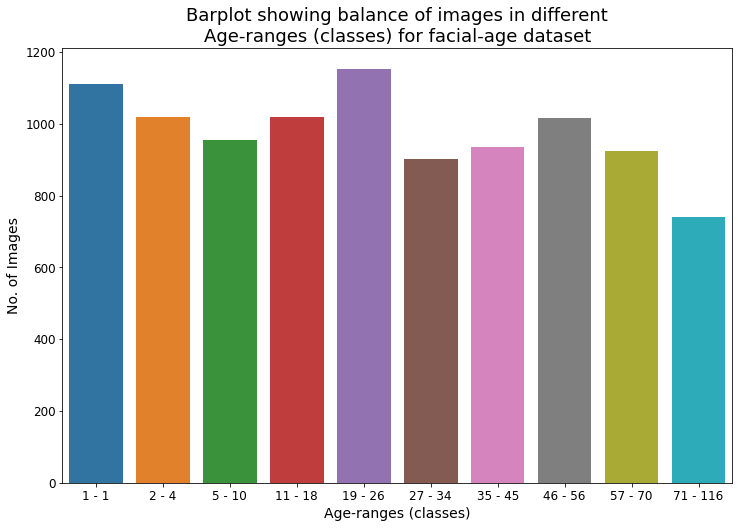

In [ ]:
# Plotting the balance of images in different age-ranges in a barplot.

plt.figure(figsize=(12, 8))

ax = sns.barplot(x=facial_age_classes['Age-ranges (classes)'], y=facial_age_classes['No. of images'])
ax.tick_params(axis='both', labelsize=12)

plt.xlabel("Age-ranges (classes)", fontsize=14)
plt.ylabel("No. of Images", fontsize=14)

plt.title("Barplot showing balance of images in different\nAge-ranges (classes) for facial-age dataset", fontsize=18)

# Exporting image 
plt.savefig('/content/drive/My Drive/age_classification/plot_images/barplot_facial_age_images_in_classes.png', bbox_inches='tight');

In [ ]:
# Applying on utk dataset
utkface_classes = split_classes(images_df['utkface_images'], 11)
utkface_classes

Total no. of images in dataset	= 23708
No. of classes desired		= 11
So, target no. of images/class	>= 23708/11 = ~2155

Mean no. of images/class	= ~2371
Mean class balance		= 10.0%
Std. of class balance		= 1.36%



,Age-ranges (classes),No. of images,Class balance (%)
0,1 - 4,2167,9.14
1,5 - 18,2328,9.82
2,19 - 24,2408,10.16
3,25 - 26,2931,12.36
4,27 - 30,2827,11.92
5,31 - 35,2446,10.32
6,36 - 42,2291,9.66
7,43 - 53,2313,9.76
8,54 - 65,2298,9.69
9,66 - 116,1699,7.17


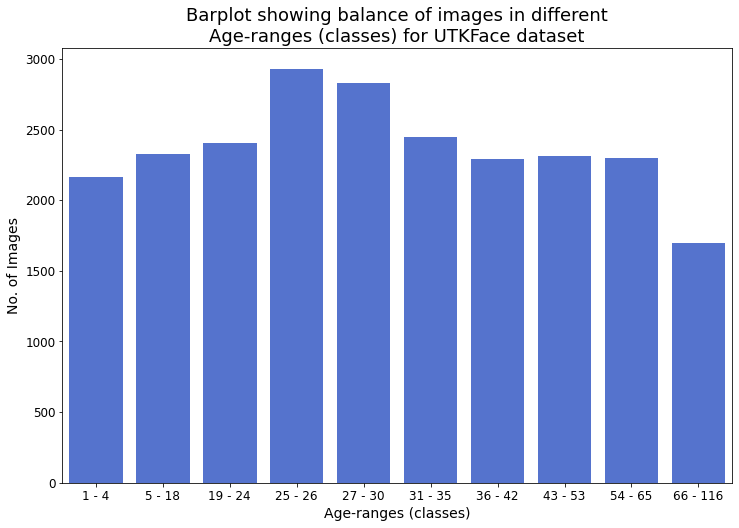

In [ ]:
# Plotting the balance of images in different age-ranges in a barplot.
plt.figure(figsize=(12, 8))

ax = sns.barplot(x=utkface_classes['Age-ranges (classes)'], y=utkface_classes['No. of images'], color='royalblue')

ax.tick_params(axis='both', labelsize=12)

plt.xlabel("Age-ranges (classes)", fontsize=14)
plt.ylabel("No. of Images", fontsize=14)

plt.title("Barplot showing balance of images in different\nAge-ranges (classes) for UTKFace dataset", fontsize=18)

# Exporting plot image in PNG format.
plt.savefig('/content/drive/My Drive/age_classification/plot_images/barplot_utkface_images_in_classes.png', bbox_inches='tight');

In [ ]:
# Applying the above function on the combined facial-age and UTKFace datasets to split them into 12 classes.

combined_classes = split_classes(images_df['combined_images'], 12)
combined_classes

Total no. of images in dataset	= 33486
No. of classes desired		= 12
So, target no. of images/class	>= 33486/12 = ~2790

Mean no. of images/class	= ~3044
Mean class balance		= 9.09%
Std. of class balance		= 0.68%



,Age-ranges (classes),No. of images,Class balance (%)
0,1 - 2,3192,9.53
1,3 - 9,2816,8.41
2,10 - 20,3136,9.37
3,21 - 25,3474,10.37
4,26 - 27,3217,9.61
5,28 - 31,3063,9.15
6,32 - 36,3086,9.22
7,37 - 45,3207,9.58
8,46 - 54,2802,8.37
9,55 - 65,2796,8.35


In [ ]:
# Exporting above dataframe for further usage
combined_classes.to_csv("/content/drive/My Drive/age_classification/input_output/combined_faces_classes_summary.csv", index=True, index_label='Class label')

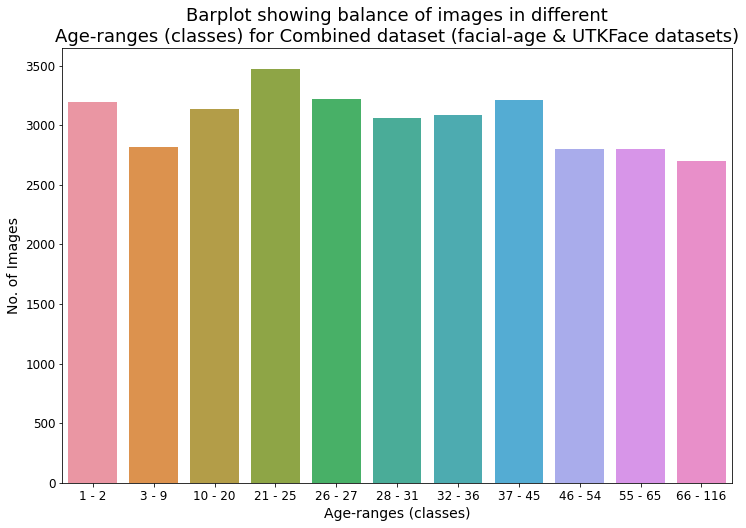

In [ ]:
# Plotting the balance of images in different age-ranges in a barplot.

plt.figure(figsize=(12, 8))

ax = sns.barplot(x=combined_classes['Age-ranges (classes)'], y=combined_classes['No. of images'])

ax.tick_params(axis='both', labelsize=12)

plt.xlabel("Age-ranges (classes)", fontsize=14)
plt.ylabel("No. of Images", fontsize=14)

plt.title("Barplot showing balance of images in different\nAge-ranges (classes) for Combined dataset (facial-age & UTKFace datasets)", fontsize=18)

# Exporting plot image in PNG format.
plt.savefig('/content/drive/My Drive/age_classification/plot_images/barplot_combined_faces_images_in_classes.png', bbox_inches='tight');

## Dataset Preparation

### Merging the Datasets

merging the facial-age and UTKFace datasets into one combined_faces dataset.


In [ ]:
os.mkdir("combined_faces")

progress_counter = 0
age_file_counter = [1] * 117

print("Merging images from facial-age dataset into combined_faces.\n")

for age in facial_age_folders:
    age_path = os.path.join(facial_age_path, age)

    img_files = os.listdir(age_path)

    for img in img_files:

        img_src = os.path.join(age_path, img)

        new_filename = str(int(age)) + "_" + str(age_file_counter[int(age)]) + ".jpg"
        age_file_counter[int(age)] += 1

        img_dest = os.path.join("/content/combined_faces", new_filename)

        # Converting the .PNG images to .JPG so as to maintain consistency with of filetype throughout the combined datasets.
        png_image = cv2.imread(img_src)
        cv2.imwrite(img_dest, png_image, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

        progress_counter += 1

        if progress_counter % 1000 == 0:
            print(f"Images copied to combined_faces folder: {progress_counter} of 33486")

print("\nMerging images from UTKFace dataset into combined_faces.\n")

for img in utkface_image_names:

    file_type = img.split(".")[-1]
    age = img.split("_")[0]

    img_src = os.path.join(utkface_path, img)

    new_filename = age + "_" + str(age_file_counter[int(age)]) + "." + file_type
    age_file_counter[int(age)] += 1

    img_dest = os.path.join("/content/combined_faces", new_filename)

    shutil.copy(img_src, img_dest);
    progress_counter += 1

    if progress_counter % 1000 == 0:
        print(f"Images copied to combined_faces folder: {progress_counter} of 33486")

print("\nDone merging images from both datasets into combined_faces.")

Merging images from facial-age dataset into combined_faces.

Images copied to combined_faces folder: 1000 of 33486
Images copied to combined_faces folder: 2000 of 33486
Images copied to combined_faces folder: 3000 of 33486
Images copied to combined_faces folder: 4000 of 33486
Images copied to combined_faces folder: 5000 of 33486
Images copied to combined_faces folder: 6000 of 33486
Images copied to combined_faces folder: 7000 of 33486
Images copied to combined_faces folder: 8000 of 33486
Images copied to combined_faces folder: 9000 of 33486

Merging images from UTKFace dataset into combined_faces.

Images copied to combined_faces folder: 10000 of 33486
Images copied to combined_faces folder: 11000 of 33486
Images copied to combined_faces folder: 12000 of 33486
Images copied to combined_faces folder: 13000 of 33486
Images copied to combined_faces folder: 14000 of 33486
Images copied to combined_faces folder: 15000 of 33486
Images copied to combined_faces folder: 16000 of 33486
Images co

In [ ]:
# Defining a function to get all paths of files before zipping combined_faces folder.

def get_all_file_paths(path):

    file_paths = []

    # Crawling through each directory and subdirectories at the given path.
    for root, dirs, files in os.walk(path):
        for filename in files:
            filepath = os.path.join(root, filename)
            file_paths.append(filepath)

    # Returning all file paths.
    return file_paths

# Calling above defined function to get file paths of all images before zipping the folder.
file_paths = get_all_file_paths("/content/combined_faces")

In [ ]:
# Zipping the combined_faces dataset folder.
combined_faces_zip_path = "/content/drive/My Drive/Faces_Dataset/ZIPPED_DATASET/combined_faces.zip"
with ZipFile(combined_faces_zip_path, 'w') as myzip:
    for file in file_paths:
        myzip.write(file)
    print('Done zipping combined_faces!')